# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AyushShah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta

from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key= "5d82fbfd2ffa42d8a44ff47c610c9a28")

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8044


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Khari Johnson',
 'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
 'publishedAt': '2021-07-19T11:00:00Z',
 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

In [8]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about ethereum: 2380


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.013875,0.039790,0.035850,0.92435
std,0.352450,0.056534,0.058981,0.08057
min,-0.827100,0.000000,0.000000,0.65300
25%,-0.051600,0.000000,0.000000,0.86775
50%,0.000000,0.000000,0.000000,0.92950
75%,0.202300,0.079000,0.069250,1.00000
max,0.865800,0.276000,0.287000,1.00000


In [13]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.154352,0.053050,0.020130,0.926830
std,0.330817,0.059883,0.042159,0.071246
min,-0.812600,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.864250
50%,0.000000,0.039000,0.000000,0.930000
75%,0.454225,0.094750,0.008250,1.000000
max,0.771700,0.194000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum
Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ', '.join(output)
    


In [27]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []
for i in range (0,100):
    try:
        doc=bitcoin_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            tokens = tokenizer(doc)
            bitcoin_tokens.append({"token": tokens })
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df_tokens = pd.DataFrame(bitcoin_tokens)                    
bitcoin_df_comb=pd.concat([bitcoin_df, bitcoin_df_tokens],axis="columns", join="inner")

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text", "token"]
bitcoin_df_comb = bitcoin_df_comb[cols]

bitcoin_df_comb.head()

,date,compound,positive,negative,neutral,text,token
0,2021-07-19,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","like, dogecoin, devotee, mayor, reno, leader, ..."
1,2021-07-05,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...,"filed, underthe, supply, chain, attack, ha, re..."
2,2021-07-05,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...,"image, copyrightgetty, imagesthe, gang, behind..."
3,2021-07-14,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"retail, investor, grew, comfortable, buying, c..."
4,2021-07-21,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich...","longtime, techcrunch, reader, know, well, mich..."


In [28]:
# Create a new tokens column for Ethereum
ethereum_tokens = []
for i in range (0,100):
    try:
        doc=ethereum_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            tokens = tokenizer(doc)
            ethereum_tokens.append({"token": tokens })
    except AttributeError:
        pass

# Create DataFrame
ethereum_df_tokens = pd.DataFrame(ethereum_tokens)                    
ethereum_df_comb=pd.concat([ethereum_df, ethereum_df_tokens],axis="columns", join="inner")

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text", "token"]
ethereum_df_comb = ethereum_df_comb[cols]

ethereum_df_comb.head()

,date,compound,positive,negative,neutral,text,token
0,2021-07-16,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"many, blockchain, platform, competing, investo..."
1,2021-07-14,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"retail, investor, grew, comfortable, buying, c..."
2,2021-07-02,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"bitcoin, ethereumyuriko, nakaoether, overtook,..."
3,2021-07-17,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu...","anthony, di, iorio, cofounder, ethereum, netwo..."
4,2021-07-05,0.7717,0.194,0.000,0.806,"Ether holders have ""staked"" more than $13 bill...","ether, holder, staked, billion, worth, cryptoc..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [30]:
from collections import Counter
from nltk import ngrams
from nltk import bigrams

import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


processed_ethereum = [ sub['token'] for sub in ethereum_tokens ] 
processed_bitcoin  = [ sub['token'] for sub in bitcoin_tokens ]

In [32]:
def tokenizer_clean(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)
# Generate the Bitcoin N-grams where N=2
processed3 = "bitcoin "
for i in range (0,95):
    tokensbc=tokenizer_clean(processed_bitcoin[i])
    #print(tokens)
    processed3= processed3 + tokensbc
type(processed3)

n = 2
bigramsbc = ngrams(processed3.split(), n)

gramsall=[]
for grams in bigramsbc:
    #print(grams)
    gramsall.append(grams)
    
word_fd = nltk.FreqDist(gramsall)
word_fd

FreqDist({('june', 'reuters'): 14, ('reuters', 'bitcoin'): 13, ('taken', 'june'): 12, ('illustration', 'taken'): 11, ('july', 'reuters'): 11, ('el', 'salvador'): 10, ('virtual', 'currency'): 10, ('bitcoin', 'seen'): 10, ('charrepresentation', 'virtual'): 9, ('june', 'reutersedgar'): 9, ...})

In [33]:
# Generate the Ethereum N-grams where N=2
processed2 = "ethereum "
for i in range (0,95):
    tokens=tokenizer_clean(processed_ethereum[i])
    #print(tokens)
    processed2= processed2 + tokens
type(processed2)

n = 2
bigrams = ngrams(processed2.split(), n)

gramsall_et=[]
for grams in bigrams:
    #print(grams)
    gramsall_et.append(grams)
    
word_fd_eth = nltk.FreqDist(gramsall_et)
word_fd_eth

FreqDist({('taken', 'june'): 17, ('illustration', 'taken'): 17, ('bitcoin', 'ethereum'): 13, ('cryptocurrencies', 'bitcoin'): 11, ('ethereum', 'dogecoin'): 11, ('june', 'reutersdado'): 11, ('dogecoin', 'ripple'): 10, ('ripple', 'litecoin'): 10, ('nonfungible', 'token'): 9, ('pc', 'motherboard'): 9, ...})

In [34]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin word cloud')

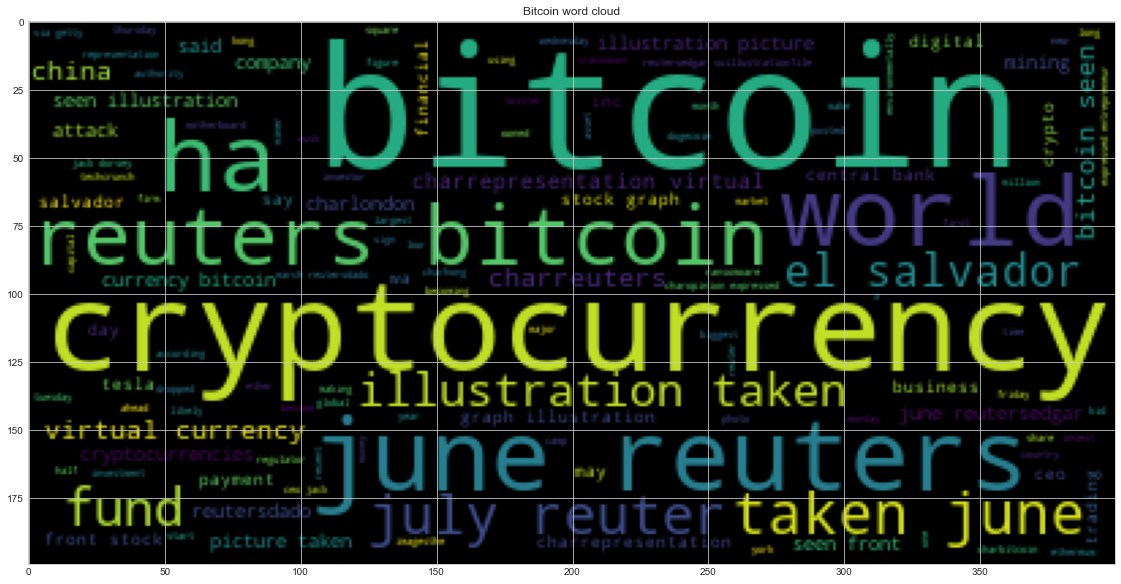

In [36]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(processed3)
plt.imshow(wc)
plt.title('Bitcoin word cloud')

Text(0.5, 1.0, 'Ethereum word cloud')

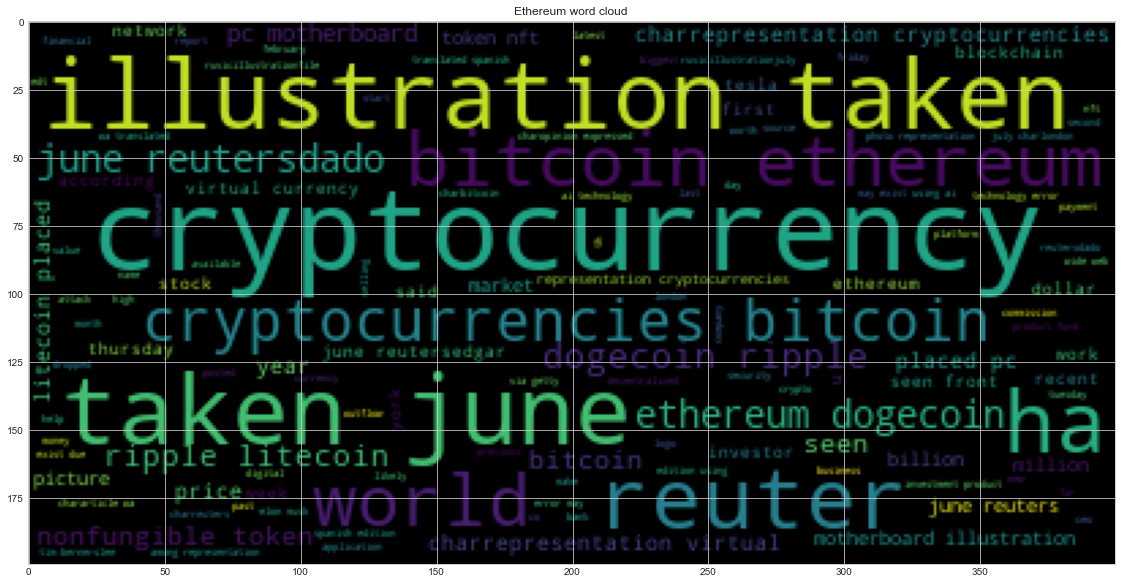

In [37]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(processed2)
plt.imshow(wc)
plt.title('Ethereum word cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [47]:
import spacy
from spacy import displacy

In [48]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [49]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [50]:
# Concatenate all of the Bitcoin text together
bitcoin_text = []
for i in range (0,100):
    try:
        doc=bitcoin_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            bitcoin_text.append(doc)
            
    except AttributeError:
        pass
    
bitcoin_text= ', '.join(bitcoin_text)
regex = re.compile("[^a-zA-Z ]")
re_clean = regex.sub('', bitcoin_text)

In [51]:
# Run the NER processor on all of the text
NER_bit = nlp(re_clean)
NER_bit.user_data["title"] = "Bitcoin"

# Add a title to the document
# YOUR CODE HERE!

In [52]:
# Render the visualization
displacy.render(NER_bit, style='ent')

In [53]:
# List all Entities
print([ent.text for ent in NER_bit.ents])

['Reno', 'El Salvador', 'Canadian', 'Daymak', 'thousand', 'Alex Castro', 'The VergeThree days', 'the holiday weekend', 'Bitcoin and Ethereum', 'Michael Arrington', 'TechCrunch', 'Crunchbase', 'CrunchFund', 'Tuesday', 'June', 'Reuters', 'El Salvador', 'Pr  chars', 'June', 'Reuters', 'El Salvador', 'earlier this year', 'March   ', 'June', 'Reuters', 'June', 'June   REUTERSEdgar SuIllustrationFile', 'James MartinCNETA', 'UK', 'Spain', 'Twitter', 'the US Department', 'Justi  chars', 'Reuters', 'StaffJune', 'Friday', 'Reuters', 'StaffJune', 'GMT', 'Friday', 'Reuters', 'November   REUTERSDado RuvicIllustrationSINGAPORE', 'November   ', 'July', 'Reuters', 'June', 'Reuters', 'June', 'Reuters', 'Nasdaq Dubai', 'Wednesday', 'the Middle Easts', 'first', 'Canadian', 'March   ', 'June', 'Reuters', 'Entrepreneur', 'ownCrypto Kids Camp', 'Los Angeles', 'CNBC', 'five', 'Entrepreneur', 'first', 'more than three decades ago', 'six months ago', 'dozens', 'February   REUTERSDado', 'Reuters', 'Tesla Inc TS

---

### Ethereum NER

In [54]:
# Concatenate all of the Ethereum text together
ethereum_text = []
for i in range (0,100):
    try:
        doc=ethereum_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            ethereum_text.append(doc)
            
    except AttributeError:
        pass
    
ethereum_text= ', '.join(ethereum_text)
regex = re.compile("[^a-zA-Z ]")
re_clean_eth = regex.sub('', ethereum_text)

In [55]:
# Run the NER processor on all of the text
NER_ethe = nlp(re_clean_eth)
NER_ethe.user_data["title"] = "Ethereum"

# Add a title to the document
# YOUR CODE HERE!

In [56]:
# Render the visualization
displacy.render(NER_ethe, style='ent')

In [57]:
# List all Entities
print([ent.text for ent in NER_ethe.ents])

['Ethereum', 'Ethereum Killers', 'Solana', 'Bitcoin and Ethereum', 'Friday', 'Anthony Di Iorio', 'Ethereum', 'Bloomberg', 'Slashdot', 'NFT', 'recent weeks', 'recent months', 'American Express', 'Spanish', 'AI', 'this processThe Securities and Exchange Commission', 'Reuters', 'StaffJune', 'Friday', 'London', 'Ethereum', 'August', 'Getty ImagesInvestors', 'the third week', 'February', 'June   REUTERSEdgar', 'Reuters', 'StaffJune', 'GMT', 'Friday', 'Hackaday', 'Bitcoin Ethereum and Dogecoin', 'June', 'Watch', 'nowPolygon', 'million', 'ai  chars Representations', 'June', 'February   REUTERSDado', 'Reuters', 'Tesla Inc TSLAO w  chars Representation of the', 'Ethereum', 'February', 'June', 'the second half of the year', 'summer', 'June   REUTERSDado', 'Nonfungible', 'Thursday', 'Singaporebased', 'Mark Cuban', 'Marc Benioff', 'Getty Images Brendan McDermidReutersScrutiny', 'the Securities and Exchange Commission', 'Nick Friedman', 'College Hunks', 'CryptoPunks', 'first', 'Matt Hall', 'John Wa

---